In [388]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0,"../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [389]:
import matplotsoccer as mps
import pandas as pd
from tqdm import tqdm

In [390]:
# get x,y-coordinates of all actions of Vincent Kompany in the 2015/16 Premier League
data = "../data/spadl-opta.h5"
games = pd.read_hdf(data,key="games")
epl16 = games[(games.competition_id == 8) & (games.season_id == 2016)]

def get_actions(games, hdf_url):
    actions = []
    for game in tqdm(list(games.itertuples())):
        a = pd.read_hdf(hdf_url, key="actions/game_" + str(game.game_id))
        a["left_to_right"] = a["team_id"] == game.home_team_id
        actions.append(a)
    actions = pd.concat(actions)

    actions = always_ltr(actions)

    actiontypes = pd.read_hdf(hdf_url, key="actiontypes")
    actions = actions.merge(actiontypes)

    return actions


def always_ltr(actions):
    away_idx = ~actions.left_to_right
    actions.loc[away_idx, "start_x"] = 105 - actions[away_idx].start_x.values
    actions.loc[away_idx, "start_y"] = 68 - actions[away_idx].start_y.values
    actions.loc[away_idx, "end_x"] = 105 - actions[away_idx].end_x.values
    actions.loc[away_idx, "end_y"] = 68 - actions[away_idx].end_y.values
    return actions

actions = get_actions(epl16,data)
players = pd.read_hdf(data,key="players")
actions = actions.merge(players)

pa = actions[actions.last_name.str.contains("Kompany")]
print(set(pa.soccer_name))

x = pa.start_x
y = pa.start_y

100%|██████████| 380/380 [00:04<00:00, 78.06it/s]


{'Vincent Kompany'}


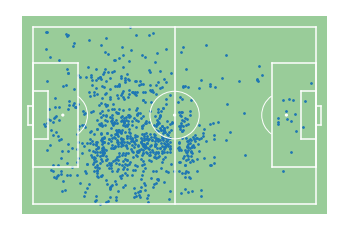

In [393]:
mps.field("green",show=False)
plt.scatter(x,y,s=3)
#plt.axis("on")
plt.savefig("../img/scatter.png",dpi=100,bbox_inches="tight",padding=0)
plt.show()

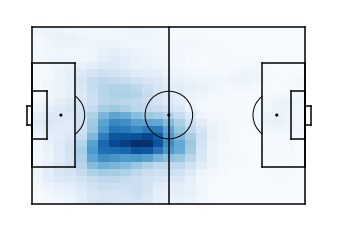

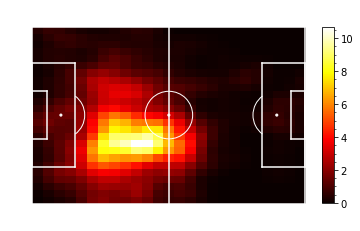

In [387]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
hm = mps.count(x,y,n=25,m=25)
hm = gaussian_filter(hm,1)
mps.heatmap(matrix=hm,show=False)
plt.savefig("../img/heatmap_blue.png",dpi=100,bbox_inches="tight",padding=0)
plt.show()
mps.heatmap(matrix=hm,cmap="hot",linecolor="white",cbar=True,show=False)
plt.savefig("../img/heatmap_hot.png",dpi=100,bbox_inches="tight",padding=0)
plt.show()